In [1]:
%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2

In [2]:
import puzzlesolver

import itertools
import sklearn

In [3]:
from puzzlesolver.image import Image

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
image_path = "../puzzles/binair/binair1.jpeg"

In [6]:
img = puzzlesolver.image.read_img(image_path)

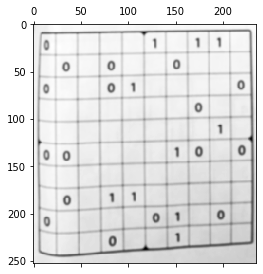

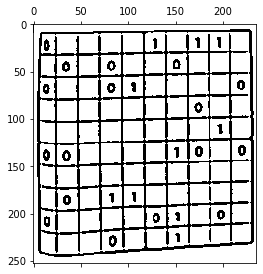

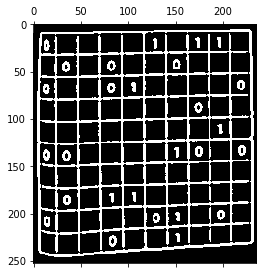

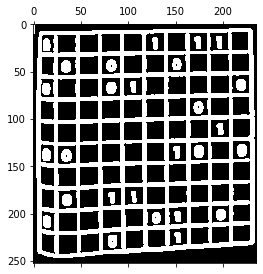

In [7]:
show_steps = True

processed_image = (
    img
    .pipe(puzzlesolver.image.blur, kernel=5, show_result=show_steps)
    .pipe(puzzlesolver.image.threshold, constant=3, show_result=show_steps)
    .pipe(puzzlesolver.image.invert, show_result=show_steps)
    .pipe(puzzlesolver.image.dilute, kernel=np.ones((3,3), np.uint8), show_result=show_steps)
)

if not show_steps:
    processed_image.show()


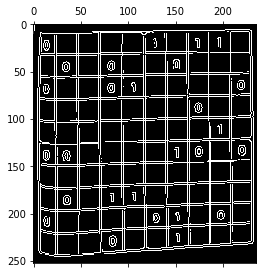

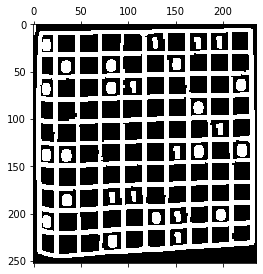

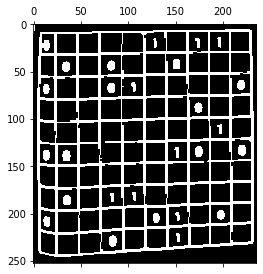

In [8]:
img_copy = img.copy()

canny_img = (
    img
    .pipe(puzzlesolver.image.canny, show_result=True)
    .pipe(puzzlesolver.image.dilute, kernel=np.ones((3,3), np.uint8), show_result=True)
    .pipe(puzzlesolver.image.erode, show_result=True)
)

48


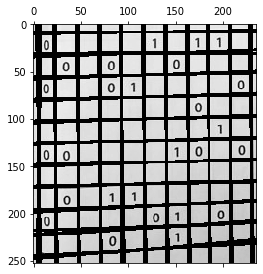

In [57]:
lines = cv2.HoughLines(canny_img, rho=1, theta=np.pi/180, threshold=165)
print(len(lines))

img_copy = img.copy()

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img_copy,(x1,y1),(x2,y2),(0,150,150),2)

img_copy.show()

In [64]:
new_img, ext_contours = cv2.findContours(processed_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
new_img, contours = cv2.findContours(processed_image.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

processed = cv2.cvtColor(processed_image, cv2.COLOR_GRAY2RGB)

# Draw all of the contours on the image in 2px red lines
all_contours = cv2.drawContours(processed.copy(), contours, -1, (0, 0, 0), 2)
external_only = cv2.drawContours(processed.copy(), ext_contours, -1, (0, 0, 0), 2)

error: OpenCV(4.5.1) /tmp/pip-req-build-ms668fyv/opencv/modules/imgproc/src/drawing.cpp:2501: error: (-215:Assertion failed) npoints > 0 in function 'drawContours'


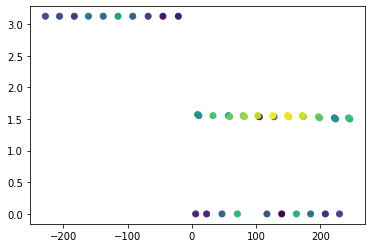

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), sklearn.cluster.SpectralClustering(n_clusters=39))

cluster_indices = pipe.fit_predict(lines[:, 0, :])

plt.scatter(lines[:, 0, 0], lines[:, 0, 1], c=cluster_indices)

In [ ]:
def make_groups(x: np.ndarray, n_groups):
    groups = 0
    while groups < n_groups:
        


groups_y = make_groups(lines[0, 0, 1])


In [33]:
x = lines[:, 0, 1]

In [27]:
cluster_indices

array([32, 12,  2,  7, 21,  6,  9, 28,  5,  1,  8, 23, 19, 22, 36, 17, 18,
       37, 16, 29, 33,  4, 15,  1, 11, 16, 30, 18, 24,  0, 10, 25, 11, 26,
        9, 17, 13, 33,  8, 15, 36,  3, 27, 31, 14,  5, 38, 37,  2, 34, 35,
        9, 19, 20], dtype=int32)

In [11]:
clusterer = sklearn.cluster.KMeans(n_clusters=39)

In [12]:
clusterer.fit(lines[:, 0, :])

KMeans(n_clusters=39)

In [16]:
trans = clusterer.fit_predict(lines[:, 0, :])

In [17]:
trans

array([27, 32,  5,  0, 18, 26, 10, 11, 29, 21, 23,  3, 24, 28, 33,  8, 20,
        7, 14, 31, 34,  1,  9, 21, 25, 14, 17, 20,  2, 12, 19, 16, 25, 15,
       38,  8,  6, 34, 23,  9, 33,  4, 30, 22, 37, 38,  9,  7,  5, 35, 36,
       10, 24, 13], dtype=int32)

In [19]:
len(clusterer.cluster_centers_)

39

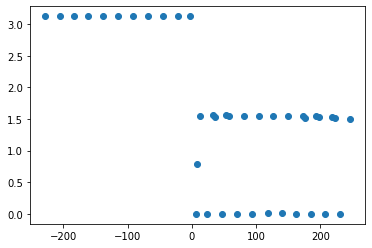

In [23]:
plt.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1], c=)

In [ ]:
cluster_centers = for cluster in set(trans):
    

In [15]:
lines

array([[[ 2.3000000e+01,  0.0000000e+00]],

       [[ 4.7000000e+01,  0.0000000e+00]],

       [[ 1.1700000e+02,  0.0000000e+00]],

       [[ 1.8500000e+02,  0.0000000e+00]],

       [[-4.5000000e+01,  3.1241393e+00]],

       [[ 2.3000000e+02,  0.0000000e+00]],

       [[ 1.1000000e+01,  1.5533431e+00]],

       [[-2.2800000e+02,  3.1241393e+00]],

       [[ 6.0000000e+00,  0.0000000e+00]],

       [[ 8.0000000e+01,  1.5533431e+00]],

       [[ 1.7400000e+02,  1.5358897e+00]],

       [[ 7.1000000e+01,  0.0000000e+00]],

       [[ 1.4000000e+02,  0.0000000e+00]],

       [[ 1.6300000e+02,  0.0000000e+00]],

       [[ 2.2200000e+02,  1.5184364e+00]],

       [[ 1.5100000e+02,  1.5358897e+00]],

       [[ 1.9700000e+02,  1.5358897e+00]],

       [[ 3.3000000e+01,  1.5533431e+00]],

       [[ 1.0500000e+02,  1.5358897e+00]],

       [[ 2.0800000e+02,  0.0000000e+00]],

       [[ 5.7000000e+01,  1.5533431e+00]],

       [[-2.1000000e+01,  3.1241393e+00]],

       [[ 2.4600000e+02,  1.5009

(array([318., 182., 190., 240., 168., 113.,  96.,  70.,  38.,  16.]),
 array([0.00384372, 0.10156859, 0.19929346, 0.29701835, 0.3947432 ,
        0.4924681 , 0.590193  , 0.6879178 , 0.7856427 , 0.8833676 ,
        0.98109245], dtype=float32),
 <BarContainer object of 10 artists>)

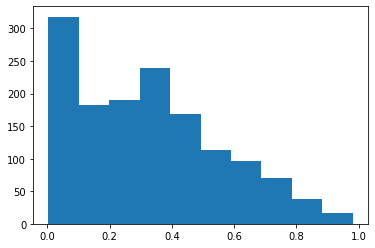

In [20]:
import itertools


ptp = lines[:, 0, :].ptp(axis=0)
distances = [(np.abs((l1 - l2) / ptp)).mean() for l1, l2 in itertools.combinations(lines[:, 0, :], 2)]

plt.hist(distances)

In [21]:
distances

[0.025210084,
 0.0987395,
 0.17016807,
 0.5714286,
 0.21743697,
 0.26120842,
 0.7636554,
 0.017857144,
 0.3084773,
 0.4044235,
 0.05042017,
 0.12289916,
 0.14705883,
 0.4520504,
 0.38026386,
 0.42858317,
 0.25910756,
 0.33194453,
 0.19432773,
 0.28431764,
 0.5462185,
 0.47446716,
 0.30778486,
 0.3561042,
 0.33263698,
 0.6932773,
 0.42789072,
 0.71638656,
 0.6691176,
 0.7405462,
 0.644958,
 0.35679662,
 0.5955882,
 0.26610255,
 0.3809563,
 0.62079835,
 0.2836252,
 0.40511596,
 0.47515962,
 0.4513579,
 0.4516924,
 0.073529415,
 0.5273109,
 0.25946552,
 0.018549599,
 0.47377467,
 0.26085043,
 0.103633635,
 0.40478146,
 0.42822522,
 0.25631428,
 0.1277933,
 0.2839597,
 0.073529415,
 0.14495799,
 0.5966387,
 0.19222689,
 0.2864185,
 0.78886557,
 0.043067228,
 0.28326723,
 0.37921342,
 0.025210084,
 0.09768908,
 0.12184874,
 0.4268403,
 0.35505375,
 0.4033731,
 0.26330924,
 0.30673444,
 0.16911764,
 0.25910756,
 0.5714286,
 0.44925708,
 0.28257477,
 0.3308941,
 0.3074269,
 0.7184874,
 0.4026

In [ ]:
np.isclose()

In [127]:
!pip install scipy

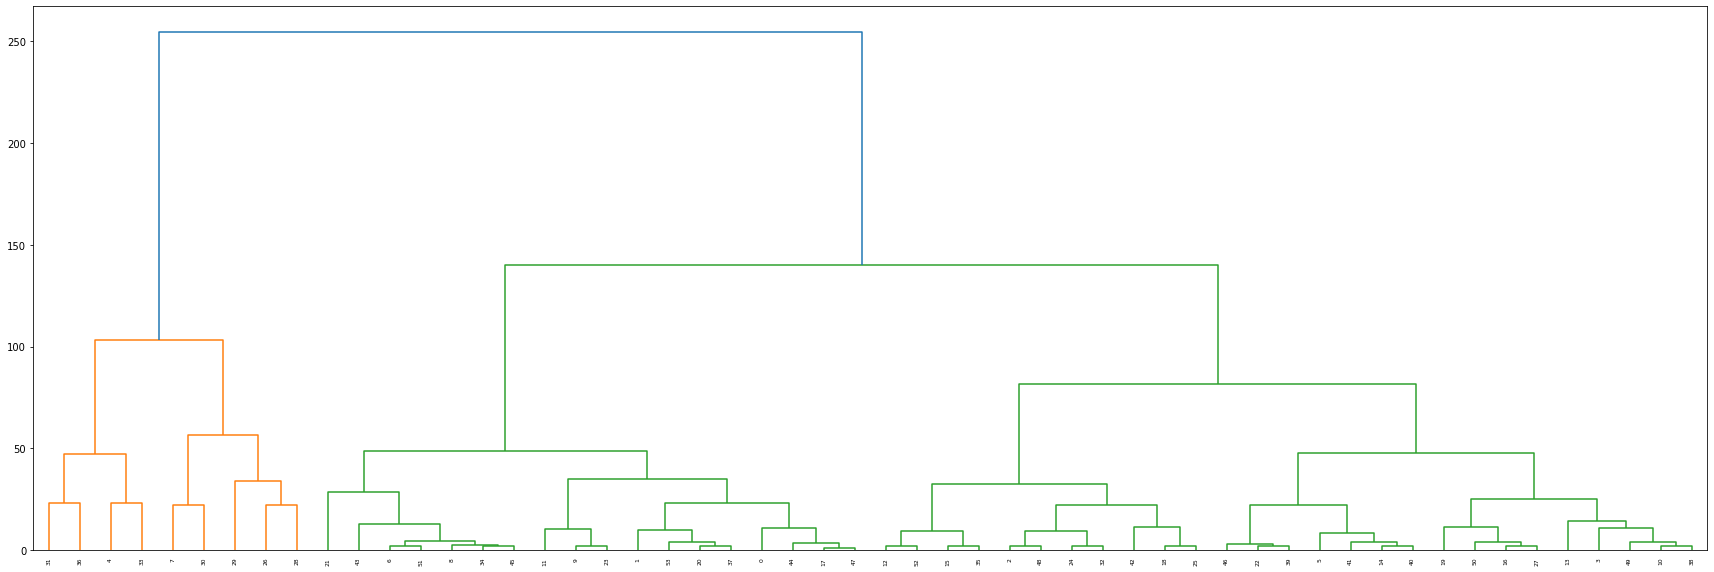

In [41]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
X = lines[:, 0, :] / lines[:, 0, :].ptp(axis=0)
Z = linkage(X,
            method='centroid',  # dissimilarity metric: max distance across all pairs of 
                                # records between two clusters
            metric='euclidean'
    )                           # you can peek into the Z matrix to see how clusters are 
                                # merged at each iteration of the algorithm

# calculate full dendrogram and visualize it
plt.figure(figsize=(30, 10))
dendrogram(Z)
plt.show()

# retrive clusters with `max_d`
from scipy.cluster.hierarchy import fcluster
max_d = 4       # I assume that your `Latitude` and `Longitude` columns are both in 
                 # units of miles
clusters = fcluster(Z, max_d, criterion='distance')

len(set(clusters))

In [43]:
lines

array([[[ 2.3000000e+01,  0.0000000e+00]],

       [[ 4.7000000e+01,  0.0000000e+00]],

       [[ 1.1700000e+02,  0.0000000e+00]],

       [[ 1.8500000e+02,  0.0000000e+00]],

       [[-4.5000000e+01,  3.1241393e+00]],

       [[ 2.3000000e+02,  0.0000000e+00]],

       [[ 1.1000000e+01,  1.5533431e+00]],

       [[-2.2800000e+02,  3.1241393e+00]],

       [[ 6.0000000e+00,  0.0000000e+00]],

       [[ 8.0000000e+01,  1.5533431e+00]],

       [[ 1.7400000e+02,  1.5358897e+00]],

       [[ 7.1000000e+01,  0.0000000e+00]],

       [[ 1.4000000e+02,  0.0000000e+00]],

       [[ 1.6300000e+02,  0.0000000e+00]],

       [[ 2.2200000e+02,  1.5184364e+00]],

       [[ 1.5100000e+02,  1.5358897e+00]],

       [[ 1.9700000e+02,  1.5358897e+00]],

       [[ 3.3000000e+01,  1.5533431e+00]],

       [[ 1.0500000e+02,  1.5358897e+00]],

       [[ 2.0800000e+02,  0.0000000e+00]],

       [[ 5.7000000e+01,  1.5533431e+00]],

       [[-2.1000000e+01,  3.1241393e+00]],

       [[ 2.4600000e+02,  1.5009

In [44]:
clusters

array([20, 18, 23, 36,  3, 30, 10,  5, 11, 14, 34, 15, 21, 37, 28, 22, 31,
       19, 25, 33, 16, 13, 27, 14, 24, 25,  7, 31,  8,  9,  6,  1, 24,  4,
       11, 22,  2, 16, 34, 27, 28, 29, 26, 12, 19, 11, 27, 19, 23, 35, 32,
       10, 21, 17], dtype=int32)

In [45]:
len(set(clusters))

37

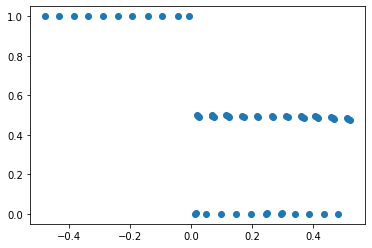

In [25]:
plt.scatter(
    lines[:, 0, 0] / lines[:, 0, 0].ptp(),
    lines[:, 0, 1] / lines[:, 0, 1].ptp(),
)

In [46]:
len(clusters)

54

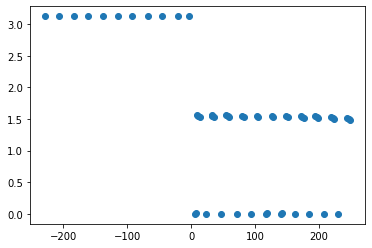

In [102]:
plt.scatter(lines[:, 0, 0], lines[:, 0, 1])

Lines: 54
number of Hough lines: 54
Number of filtered lines: 33


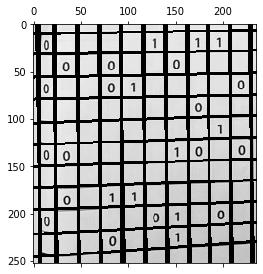

In [94]:
print(f"Lines: {len(lines)}")

if not lines.any():
    print('No lines were found')
    exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1

    # how many lines are similar to a given one
    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
        for j in range(len(lines)):
            if i == j:
                continue

            rho_i,theta_i = lines[i][0]
            rho_j,theta_j = lines[j][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                similar_lines[i].append(j)

    # ordering the INDECES of the lines by how many are similar to them
    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x : len(similar_lines[x]))

    # line flags is the base for the filtering
    line_flags = len(lines)*[True]
    for i in range(len(lines) - 1):
        if not line_flags[indices[i]]: # if we already disregarded the ith element in the ordered list then we don't care (we will not delete anything based on it and we will never reconsider using this line again)
            continue

        for j in range(i + 1, len(lines)): # we are only considering those elements that had less similar line
            if not line_flags[indices[j]]: # and only if we have not disregarded them already
                continue

            rho_i,theta_i = lines[indices[i]][0]
            rho_j,theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags[indices[j]] = False # if it is similar and have not been disregarded yet then drop it now

print('number of Hough lines:', len(lines))

filtered_lines = []

if filter:
    for i in range(len(lines)): # filtering
        if line_flags[i]:
            filtered_lines.append(lines[i])

    print('Number of filtered lines:', len(filtered_lines))
else:
    filtered_lines = lines

for line in filtered_lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img_copy,(x1,y1),(x2,y2),(0,0,255),2)

img_copy.show()

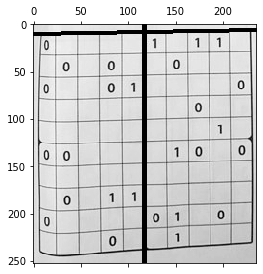

In [82]:
img.show()

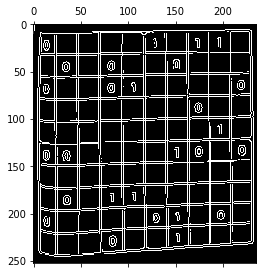

In [74]:
edges = img.pipe(cv2.Canny, 90, 150, apertureSize=3)
edges.show()

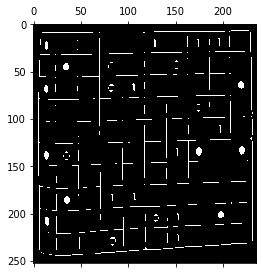

In [63]:
def erode(img: Image, kernel=None, iterations=1):
    if kernel is None:
        kernel = np.ones((5, 5), np.uint8)
    return cv2.erode(img, kernel=kernel, iterations=iterations)

processed_image.pipe(erode).show()

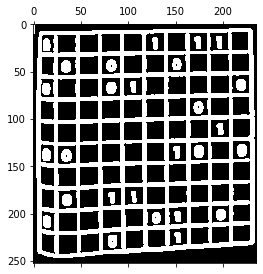

In [68]:
processed_image.show()

In [64]:
lines = cv2.HoughLines(processed_image.pipe(erode), 1, np.pi/180, 150)